# **소금물 데이터를 활용한 회귀분석 프로젝트**

In [ ]:
import numpy as np
import pandas as pd

x = np.random.uniform(0, 100, 200)
y = (10 + 2 * x) / 3
y[[23, 59, 62]] = np.nan
noise = np.random.uniform(0, 0.05, y.shape)
y = y + noise
df = pd.DataFrame({'x': x, 'y': y})
df.to_csv('salt.csv', index = False)

## 1. 프로젝트 목적 및 정의

영희는 매일 농도를 측정하며 소금물을 타는 일을 반복합니다.   
몇 십년 째 소금물을 타던 영희는 지루함을 이기지 못하고 도움을 요청했습니다.   
"소금물의 농도를 구할 수 있는 방법을 알려주세요."  

영희는 매일 소금물의 농도를 측정하는 일을 반복합니다.   
영희는 소금물의 농도를 계산하여 구하는 방법을 알지 못했고, 이 때문에 항상 소금물을 직접 타서 농도를 구해야 했습니다.   
몇 십년 째 같은 방법으로 소금물을 타서 농도를 측정하던 영희는 반복되는 업무로 힘들어했고, 더 쉬운 방법을 찾고자 도움을 요청했습니다.   
영희에게 소금물의 농도를 구할 수 있는 수학적 방법을 설명해주었지만, 영희는 이해하지 못한 것 같습니다. 

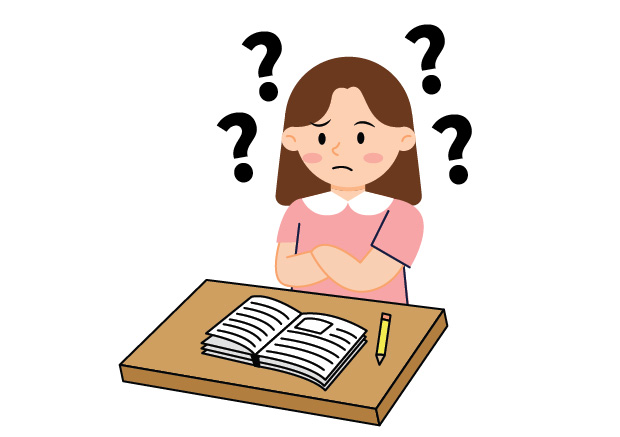

고민 끝에 영희가 지금까지 농도를 구해왔던 데이터를 활용하여 소금물의 농도를 예측하는 방법을 제안했습니다.   

"좋은 생각이에요! 소금물을 타는건 자신 있거든요."  

소금물만 몇 십년을 탄 영희는 지금까지 모아온 소금물 농도 데이터를 가져왔습니다.  
"자, 여기 농도 10% 소금물 100g과 농도 x% 소금물 200g이 섞였을 때의 소금물의 농도 y를 기록해왔어요"  

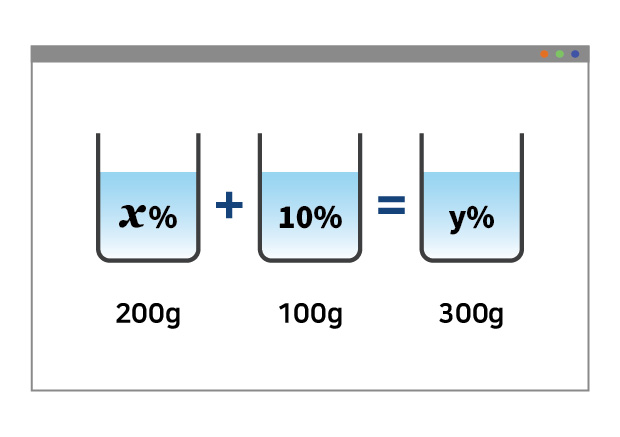

여러분은 이제 영희가 준 데이터를 이용해 두번째 소금물의 농도 $x$가 주어졌을 때, 섞인 소금물의 농도 $y$를 예측해보려고 합니다.  
코딩을 잘하는 여러분들이 영희를 도와 소금물의 농도를 예측해볼까요?

## 2. 데이터셋 불러오기

### 예제 1.
영희가 전달해준 `salt.csv`를 pandas로 불러와서 확인해보려 합니다. 
* 데이터의 앞부분 5개를 살펴보려 합니다. `df.head` 함수를 사용하면 데이터의 앞 부분을 반환해줍니다.  

In [ ]:
import pandas as pd # pandas 라이브러리를 불러옵니다. 관례적으로 pd라는 별칭을 사용합니다.

df = pd.read_csv('salt.csv') # salt.csv 파일을 불러와서 df라는 이름의 데이터 프레임에 저장하기
df.head() # 데이터의 앞부분을 출력한다

## 3. 데이터 전처리 및 시각화

### 예제 2.
여러분이 데이터를 불러오던 중, 영희에게서 갑작스레 연락이 왔습니다.  
자신이 소금물을 섞다가 깜빡 잠이 든 나머지 몇가지 데이터를 빼먹었다고 합니다.  
데이터에서 빈 값을 찾아내 제거합시다!

In [ ]:
print(df.isnull()) # 데이터 프레임의 isnull() 함수를 사용하여 각각의 데이터가 비어있는 경우에는 True를, 그렇지 않은 경우에는 False를 출력한다.
print(df.isnull().sum()) # 열 마다 데이터가 비어있는 경우 몇 개인지 확인하기
df_new = df.dropna() # 빈 값이 포함된 행 삭제하고, 삭제된 파일을 df_new에 저장하기
print(df_new.isnull().sum()) # 새로 저장한 파일의 빈 셀 개수를 출력하여 빈 셀이 제대로 제거되었는지 확인하기

### 예제 3.
불러온 데이터의 정보를 확인하려고 합니다. 1) 각 column의 이름 2) 각 column 별 평균, 분산, 최소값과 최댓값을 구하려고 합니다.   
어떤 식으로 코드를 짜야할까요?

In [ ]:
print('info')
print(df_new.info())  # info() 메서드를 활용하여 데이터에 존재하는 열 이름, 열 별 곁측치와 데이터타입을 출력합니다.  
print('\ndescribe')
print(df_new.describe())  # describe() 메서드는 데이터의 통계를 요약하여 반환합니다. (행수, 열 별 평균, 최소값, 최대값 등의 통계를 반환) 

### 예제 4.
불러온 데이터가 어떤 식으로 분포되어 있는지 산점도를 그려보려고 합니다. 어떤 식으로 코드를 짜야 할까요?
(산점도 : 좌표상에 점을 표시하여 두 변수의 관계를 나타내는 그래프)

In [ ]:
import matplotlib.pyplot as plt

x = df_new['x'] # 데이터의 x열의 값을 변수 x에 저장해줍니다.
y = df_new['y'] # 데이터의 y열의 값을 변수 y에 저장해줍니다. 
plt.scatter(x=x, y=y) # 산점도를 그려주는 scatter() 에 데이터의 x값과 y값을 입력하여 산점도를 그립니다. 

## 4. 모델 학습

### 핵심 알고리즘 소개 - 선형 회귀

이번 학습에서 사용할 모델은 선형회귀입니다. 회귀 문제에서는 데이터의 특성으로부터 레이블의 값을 예측하는 관계를 찾아야 합니다.  
선형회귀는 레이블의 값을 선형으로 추정하고 데이터와의 오차 평균을 줄여가며 해당 선형의 기울기와 y절편을 조정하여 예측합니다.
선형회귀는 데이터와 그 레이블의 관계가 다음의 선형식을 따른다고 가정합니다.  
<center>$y = ax + b$</center>
수많은 x와 y가 주어졌을 때, 우리는 a와 b의 값을 역으로 추정할 수 있습니다.  
a와 b의 값을 역으로 추정하는 과정은 다음과 같습니다.

1. 초기 추세선을 설정한다.  
* a와 b를 무작위로 정합니다.(파란선)  
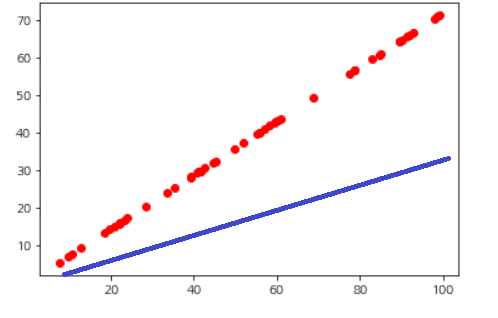
2. 추세선이 틀린 정도를 계산한다.  
* 데이터를 선택하고, 선택된 데이터에 대해 오차를 계산합니다. 여기서는 제곱 오차를 이용합니다.

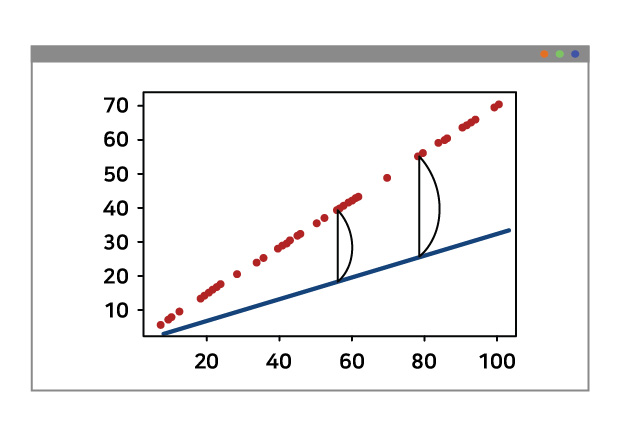

3. 오차가 줄어드는 방향으로 모델을 조정한다  
* 오차가 줄어들도록 a와 b를 일정한 폭으로 조정합니다.  
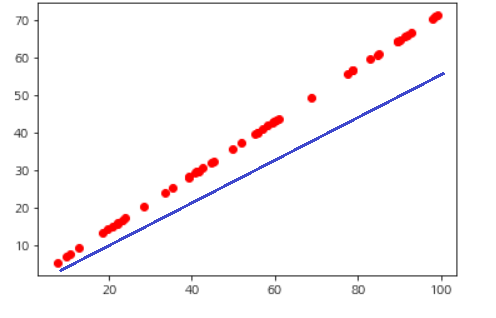
4. 2~3단계를 반복한다.  
* 추세선을 조정하는 작업을 정해진 횟수만큼 반복합니다.  
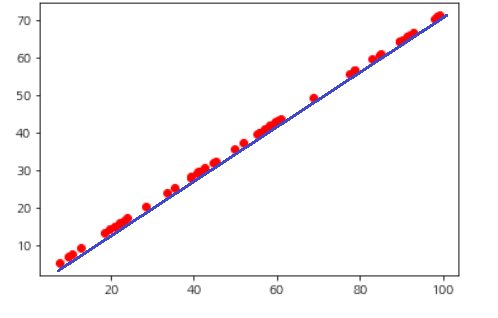

### 예제 5.
산점도를 그린 여러분은 x와 y가 선형의 관계를 가지고 있다는 것을 눈치챘습니다. 이에 따라 선형 회귀를 모델로 사용하려고 합니다.  
먼저 모델을 학습하기 위해 입력 데이터와 결과 레이블을 별도로 저장해본 후, 저장한 입력 데이터와 결과 레이블의 모양을 출력해보세요.

In [ ]:
import numpy as np

X = np.array(df_new['x']) # 입력 데이터
y = np.array(df_new['y']) # 결과 레이블
print(X.shape) # X의 모양(행, 열)을 출력합니다. 
print(y.shape) # y의 모양(행, 열)을 출력합니다. 

### 예제 6.
데이터를 학습을 위한 훈련 데이터와 성능 측정을 위한 테스트 데이터로 나눠 봅시다. 나눠진 훈련 데이터와 테스트 데이터의 모양 또한 출력해주세요!

In [ ]:
from sklearn.model_selection import train_test_split
# train_test_split : train data(훈련 데이터)와 test data(테스트 데이터)를 분리해줍니다. 

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False) # 데이터를 분리하여 저장합니다. 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

### 예제 7.
훈련 데이터를 사용해서 모델을 훈련시킵니다.
* 주의: 훈련이 가능하도록 다음과 같이 데이터 모양을 변형해야 합니다.
```python
X_train = np.reshape(X_train, (-1, 1))
```

In [ ]:
from sklearn.linear_model import SGDRegressor  # 선형회귀를 할 수 있는 SGDRegressor를 불러옵니다.

X_train = np.reshape(X_train, (-1, 1))  # 데이터 모양을 변형합니다.
model = SGDRegressor(loss = 'squared_loss', max_iter = 100, eta0 = 0.0001) # 각각 제곱오차를 사용함, 최대 패스수, 초기 학습률을 의미합니다.
model.fit(X_train, y_train) # 훈련데이터와 테스트 데이터를 넣고 훈련시켜 봅니다.

## 5. 모델 예측 및 평가

### 예제 8.
테스트 데이터를 사용해서 모델의 예측값을 출력하고, 이를 파란색의 직선으로 그려주세요. 기존의 테스트 데이터는 빨간색의 산점도로 그려주세요.
* 주의: 예측이 가능하도록 다음과 같이 데이터 모양을 변형해야 합니다.
```python
X_test = np.reshape(X_test, (-1, 1))
```

In [ ]:
X_test = np.reshape(X_test, (-1, 1))
y_pred = model.predict(X_test) # 예측한 결과를 y_pred에 저장합니다.
print(y_pred)
plt.plot(X_test, y_test, c='b')  # 선 그래프를 그립니다.  
plt.scatter(X_test, y_pred, c='r')  # 산점도를 그립니다.

### 예제 9.
훈련시킨 모델이 잘 예측하는지를 확인하기 위해서 점수를 측정해주세요.

In [ ]:
model.score(X_test, y_test)

## 6. 결론

그렇게 영희는 여러분이 전달해준 모델을 가지고 소금물이 어떤 농도를 가질지 매번 예측할 수 있었답니다. ^0^  
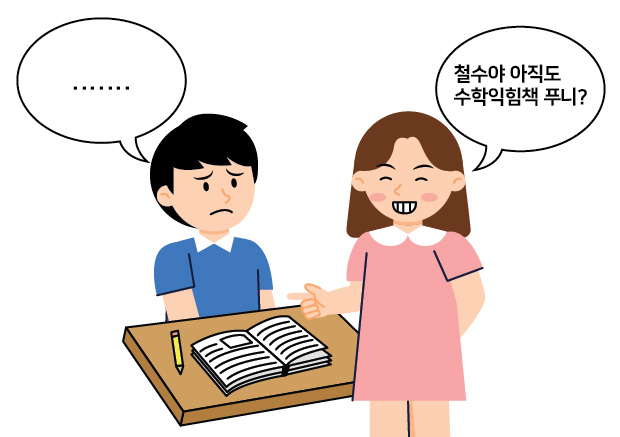
